This is a Jupyter notebook to create an in-depth Exploratory Data Analysis on the titanic dataset 

In [35]:
# Importing relevant libraries for the task
import pandas as pd
import numpy as np
# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

# plotting modules
import seaborn as sns
import missingno

import matplotlib.pyplot as plt


In [36]:
# Loading built-in dataset
df = sns.load_dataset("titanic")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [37]:
# Call the dataset
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [72]:
# List the columns in the dataset
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [69]:
# Drop null values
new_df = df.dropna()
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 182 entries, 1 to 889
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     182 non-null    int64   
 1   pclass       182 non-null    int64   
 2   sex          182 non-null    object  
 3   age          182 non-null    float64 
 4   sibsp        182 non-null    int64   
 5   parch        182 non-null    int64   
 6   fare         182 non-null    float64 
 7   embarked     182 non-null    object  
 8   class        182 non-null    category
 9   who          182 non-null    object  
 10  adult_male   182 non-null    bool    
 11  deck         182 non-null    category
 12  embark_town  182 non-null    object  
 13  alive        182 non-null    object  
 14  alone        182 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 18.2+ KB


In [81]:
# Replace null value with mean, median or mode
# This 
x = df['age'].mean()
df['age'].fillna(x, inplace = True)

In [82]:
# To see dataset info after replacing the null values of the required column (age)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB



Now we shall visualise the data to gather more info to answer the task questions.
Question 1): What is the most important factor in determining survival of the Titanic incident.

For this we shall run some comparison graphs to answer the above question.


<Axes: xlabel='alive', ylabel='count'>

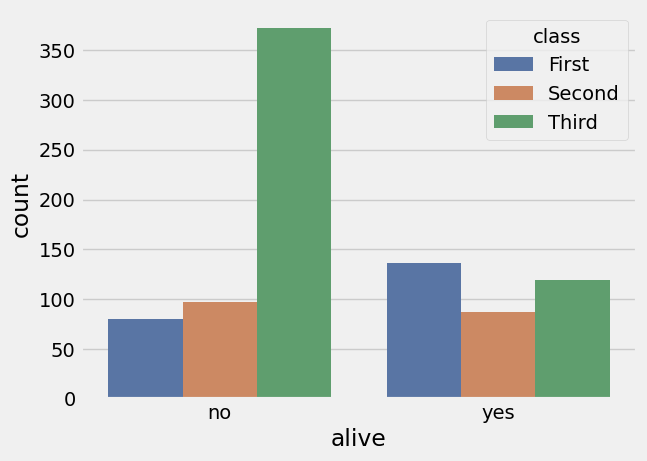

In [84]:
sns.countplot(data=df, x='alive', hue='class', palette='deep')

<Axes: xlabel='alive', ylabel='count'>

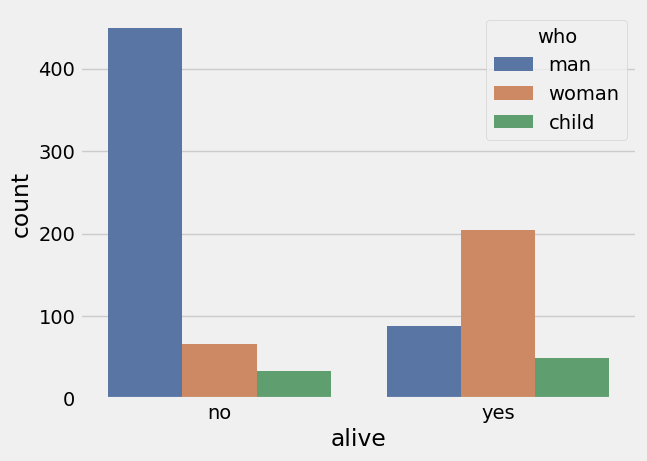

In [85]:
sns.countplot(data=df, x='alive', hue='who', palette='deep')

<Axes: xlabel='survived', ylabel='count'>

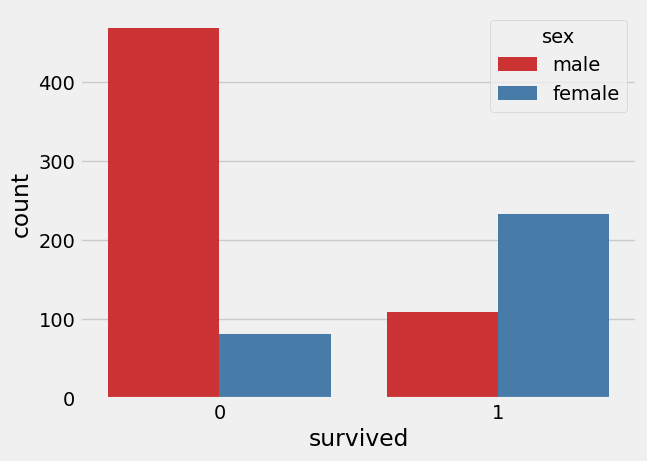

In [39]:
sns.countplot(data=df, x='survived', hue='sex', palette='Set1')

The above countplots show that not many people survived. Out of 891 persons in the titanic dataset only 342 survived. 

Also that majorly women and generally people in class 1 survived

We will further explore to get more insight into the survival data to answer question 1.

In [40]:
# Group data by required columns and get sum of the data in the columns
df.groupby(['sex', 'survived'])['survived'].count()

sex     survived
female  0            81
        1           233
male    0           468
        1           109
Name: survived, dtype: int64


The above data shows that 233 female survived out of 314. And out of 577 male, 109 survived. 
The survival ratio of female is much greater than that of male.



Question 2: In the movie, the upper class passengers were given prefrence on lifeboats. Does this show on the data?

We shall explore to gather more info to see if the data shows what the movie portrayed.


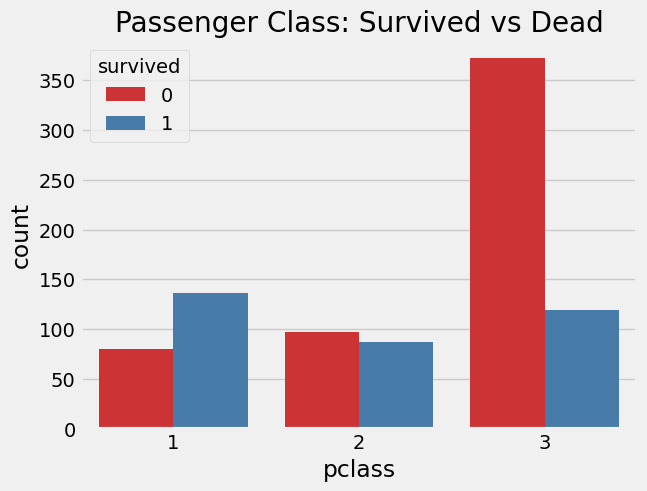

In [51]:
sns.countplot(data=df, x='pclass', hue='survived', palette='Set1')
plt.title('Passenger Class: Survived vs Dead')
plt.show()


From the above graph, the following information can be inferred:
- Class 1 passengers were given high priority during rescue.
- Although the number of passengers in Class 3 were more than in Class 1 and Class 2, only very few (almost 25%) in Class 3 survived.
- In Class 2, survival and non-survival rate is approximately 49% and 51% respectively.
- In Class 1, almost 68% people survived. 
Hence like shown in the movie, the data shows that the upper class passengers were given preference on lifeboats.



Question 3: "Women and children first". Was this the case?

For this, we will need to look at it separately as per sex and then by age of the survived groups.


In [53]:
# Crosstab to split data with count
pd.crosstab([df.sex, df.survived], df.pclass, margins=True).style.background_gradient(cmap='Set2')


From the above Crosstab data, it appears that women survival rate in Class 1 is about 95-96%, as only 3 out of 94 women died. 

Hence it appears that irrespective of the passenger class, women were given priority during rescue. 
Also because the survival rate for men even in Class 1 is very low. 


In [59]:
print('Oldest person Survived was of:',df['age'].max())
print('Youngest person Survived was of:',df['age'].min())
print('Average person Survived was of:',df['age'].mean())

Oldest person Survived was of: 80.0
Youngest person Survived was of: 0.42
Average person Survived was of: 29.69911764705882


<Axes: xlabel='pclass', ylabel='age'>

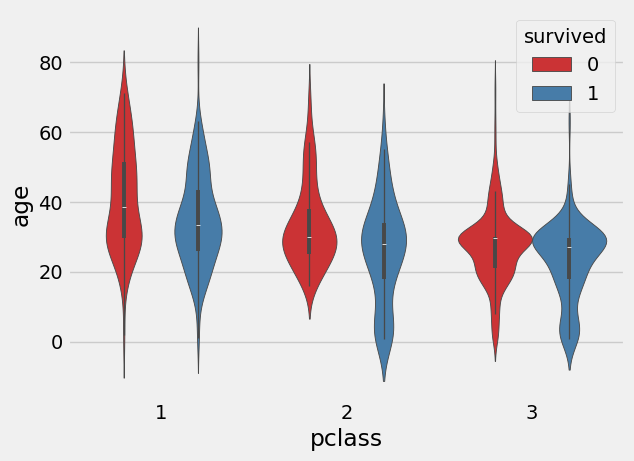

In [87]:
sns.violinplot(data=df, x='pclass', y='age', hue='survived', palette='Set1')

<Axes: xlabel='sex', ylabel='age'>

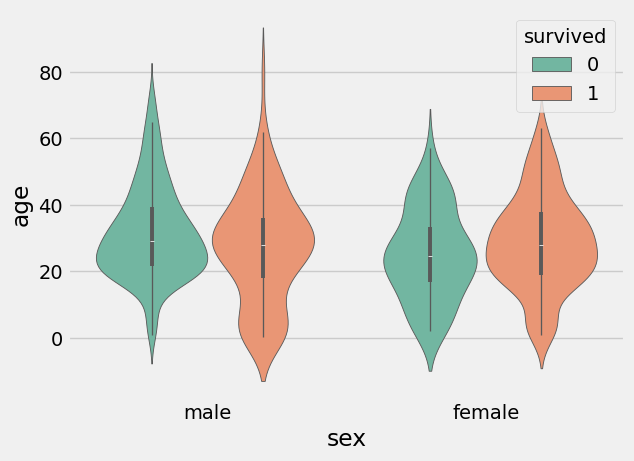

In [66]:
sns.violinplot(data=df, x='sex', y='age', hue='survived', palette='Set2')


From the above violen plots, following observations are clear:-
1) The number of children is increasing from Class 1 to 3. The no. of children in Class 3 is greater than the other two classes.
2) Survival rate of children, for age 10 and below is good irrespective of the class
3) Survival rate of women between the ages 20-30 is better.
   


Hence from the above crosstab and violin plots, it appears that "Women and children first" was the case.



Question 4: Add one other observation that you have noted in the dataset.

For this, I shall use pairplot to visualise data to draw comparisons between survival data and other parameters


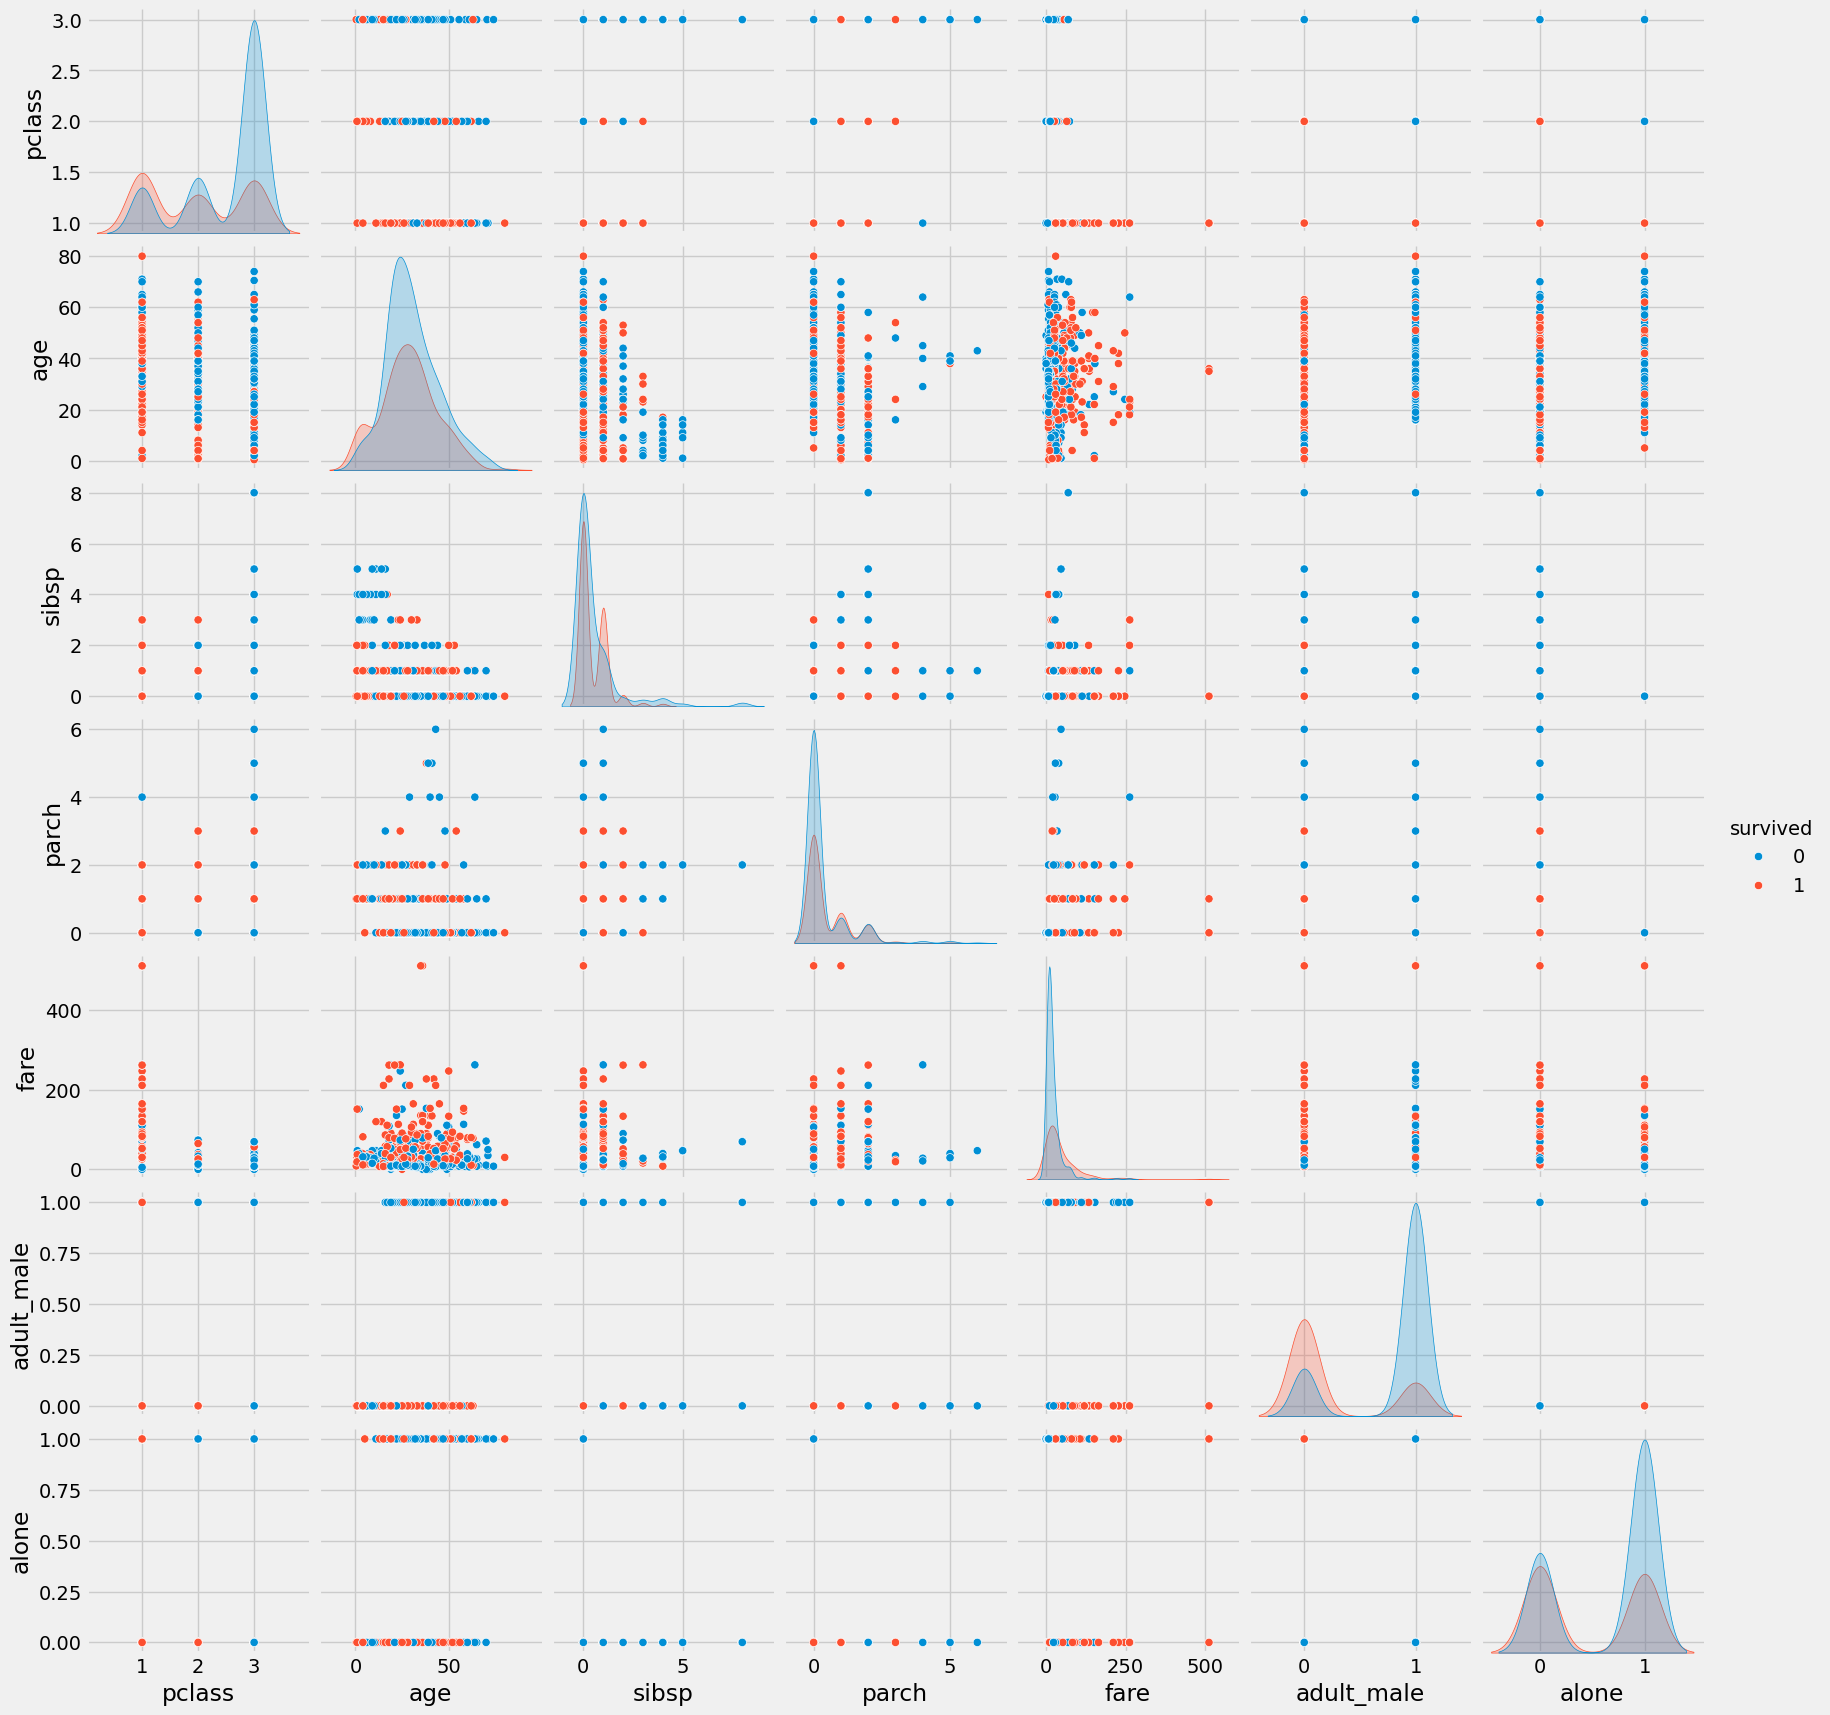

In [67]:
sns.pairplot(df,hue='survived')


Based on the analysis of comparing survival against other numerical parameters in the above pairplot, here are 2 additional observations from the Titanic dataset:

Fare: The majority of passengers paid lower fares, aligning with a larger number of third-class tickets.

Group Size: Solo travelers and those with a small family size (1-3 members) had better survival outcomes than larger families.